# 14. Morphological Operation

In [1]:
import cv2
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def padding(arr, n, m):
    leftCol= np.reshape(arr[:, 0], (1, -1)).T
    rightCol= np.reshape(arr[:, -1], (1, -1)).T
    new_arr= arr.copy()
    if n%2!=0:
        for i in range((n-1)//2):
            new_arr= np.insert(new_arr, [0], leftCol, axis= 1)
            new_arr= np.append(new_arr, rightCol, axis= 1)
    else:
        for i in range((n-1)//2):
            new_arr= np.insert(new_arr, [0], leftCol, axis= 1)
            new_arr= np.append(new_arr, rightCol, axis= 1)
        new_arr= np.insert(new_arr, [0], leftCol, axis= 1)
    topRow= np.reshape(new_arr[0, :], (1, -1))
    bottomRow= np.reshape(new_arr[-1, :], (1, -1))
    if m%2!=0:
        for i in range((m-1)//2):
            new_arr= np.insert(new_arr, [0], topRow, axis= 0)
            new_arr= np.append(new_arr, bottomRow, axis= 0)
    else:
        for i in range((m-1)//2):
            new_arr= np.insert(new_arr, [0], topRow, axis= 0)
            new_arr= np.append(new_arr, bottomRow, axis= 0)
        new_arr= np.append(new_arr, bottomRow, axis= 0)
    return new_arr

In [3]:
def erosion(img):
    new_img= np.zeros(img.shape)
    
    n, m= map(int, input('Enter structuring element size(n, m) for erosion: ').split())
    se= np.ones((n, m))
    img= padding(img, n, m)

    for i in range((se.shape[0]-1)//2, img.shape[0]-se.shape[0]//2):
        for j in range((se.shape[1]-1)//2, img.shape[1]-se.shape[1]//2):
            
            x1= i-(se.shape[0]-1)//2
            x2= x1+ se.shape[0]
            y1= j- (se.shape[1]-1)//2
            y2= y1+ se.shape[1]
            arr= img[ x1:x2 , y1:y2]
            if (arr== se).all():
                new_img[x1, y1]= 1
            else:
                new_img[x1, y1]= 0
    
    return new_img

In [4]:
def dilation(img):
    new_img= np.zeros(img.shape)
    
    n, m= map(int, input('Enter structuring element size(n, m) for dilation: ').split())
    se= np.ones((n, m))
    img= padding(img, n, m)

    for i in range((se.shape[0]-1)//2, img.shape[0]-se.shape[0]//2):
        for j in range((se.shape[1]-1)//2, img.shape[1]-se.shape[1]//2):
            
            x1= i-(se.shape[0]-1)//2
            x2= x1+ se.shape[0]
            y1= j- (se.shape[1]-1)//2
            y2= y1+ se.shape[1]
            arr= img[ x1:x2 , y1:y2]
            if (arr== se).any():
                new_img[x1, y1]= 1
            else:
                new_img[x1, y1]= 0
    
    return new_img

In [5]:
def opening(img):
    ero_img= erosion(img)
    dil_img= dilation(ero_img)
    return dil_img

In [6]:
def closing(img):
    dil_img= dilation(img)
    ero_img= erosion(dil_img)
    return ero_img

# User Data

In [7]:
binary= np.array([[0, 0, 0, 0, 0, 0, 0, 0],
                  [1, 1, 1, 0, 0, 1, 1, 1],
                  [1, 1, 1, 0, 0, 1, 1, 1],
                  [1, 1, 1, 1, 1, 1, 1, 1],
                  [1, 1, 1, 0, 0, 1, 1, 1],
                  [1, 1, 1, 0, 0, 1, 1, 1]])

In [8]:
ero_img= erosion(binary)
dil_img= dilation(binary)

Enter structuring element size(n, m) for erosion: 2 2
Enter structuring element size(n, m) for dilation: 2 2


In [9]:
open_img= opening(binary)

Enter structuring element size(n, m) for erosion: 2 2
Enter structuring element size(n, m) for dilation: 2 2


In [10]:
close_img= closing(binary)

Enter structuring element size(n, m) for dilation: 2 2
Enter structuring element size(n, m) for erosion: 2 2


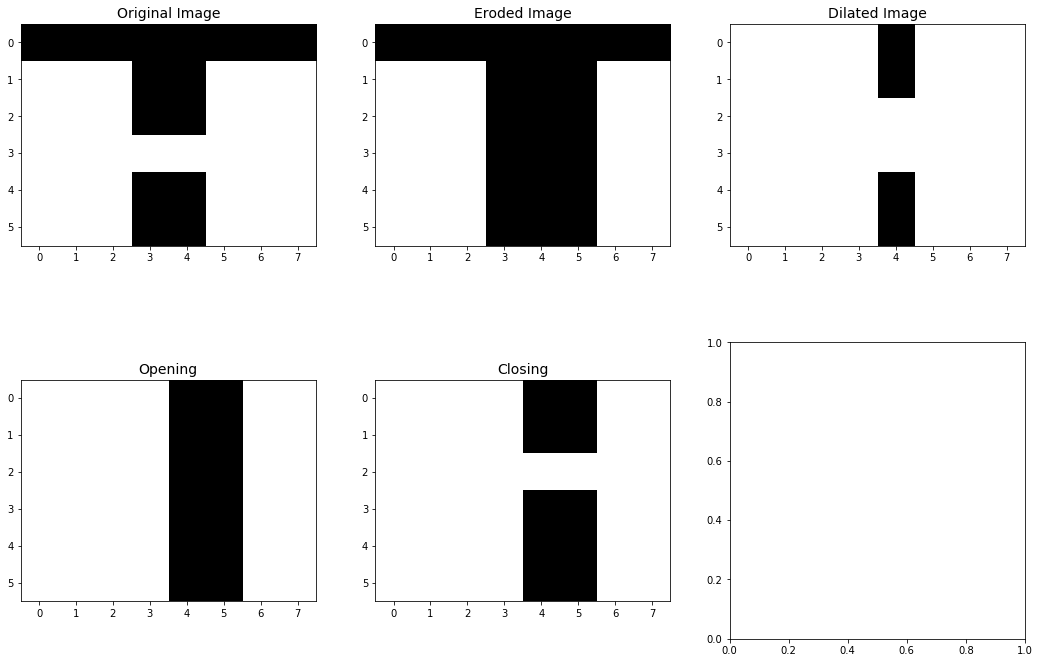

In [11]:
fig, ax= plt.subplots(nrows= 2, ncols= 3, figsize= (18, 12))
fsize= 14

ax[0, 0].set_title("Original Image", fontsize= fsize)
ax[0, 0].imshow(binary, cmap= 'gray')

ax[0, 1].set_title("Eroded Image", fontsize= fsize)
ax[0, 1].imshow(ero_img, cmap= 'gray')

ax[0, 2].set_title("Dilated Image", fontsize= fsize)
ax[0, 2].imshow(dil_img, cmap= 'gray')

ax[1, 0].set_title("Opening", fontsize= fsize)
ax[1, 0].imshow(open_img, cmap= 'gray')

ax[1, 1].set_title("Closing", fontsize= fsize)
ax[1, 1].imshow(close_img, cmap= 'gray')

plt.show()

# Image

In [12]:
ip= input("Enter image file name: ")
img= cv2.imread(ip, 0)
binary= img.copy()
m= np.max(img)
binary[img> m*0.33]= 1
binary[img< m*0.33]= 0
binary.shape

Enter image file name: ./Images/wire_bond_mask.png


(486, 486)

In [13]:
ero_img= erosion(binary)
dil_img= dilation(binary)

Enter structuring element size(n, m) for erosion: 11 11
Enter structuring element size(n, m) for dilation: 11 11


In [14]:
open_img= opening(binary)

Enter structuring element size(n, m) for erosion: 11 11
Enter structuring element size(n, m) for dilation: 11 11


In [15]:
close_img= closing(binary)

Enter structuring element size(n, m) for dilation: 11 11
Enter structuring element size(n, m) for erosion: 11 11


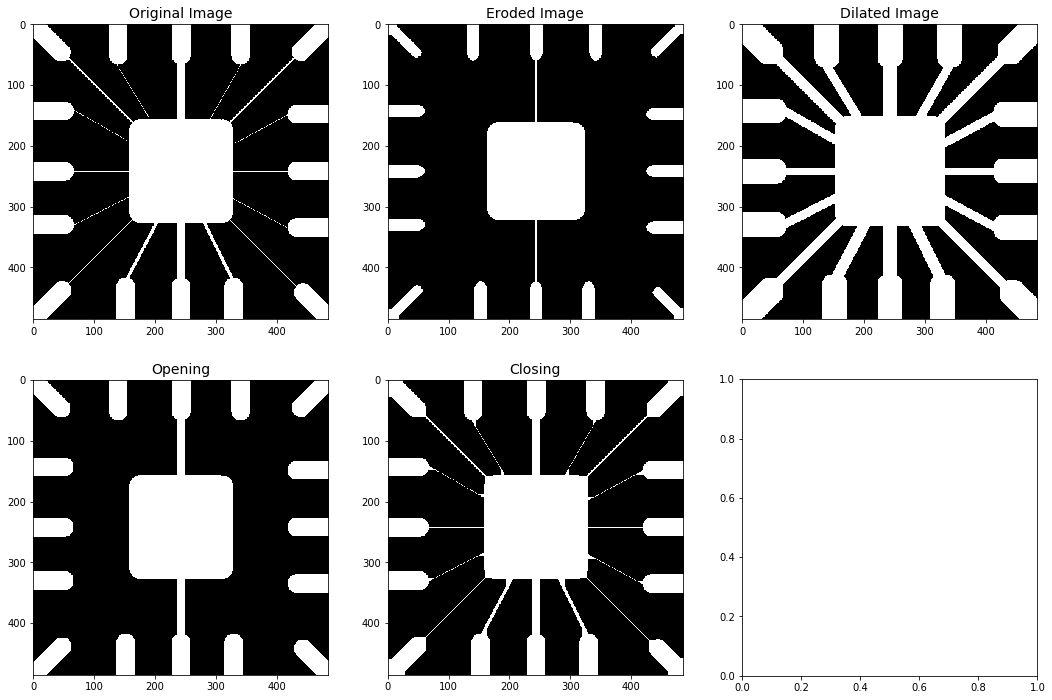

In [16]:
fig, ax= plt.subplots(nrows= 2, ncols= 3, figsize= (18, 12))
fsize= 14

ax[0, 0].set_title("Original Image", fontsize= fsize)
ax[0, 0].imshow(binary, cmap= 'gray')

ax[0, 1].set_title("Eroded Image", fontsize= fsize)
ax[0, 1].imshow(ero_img, cmap= 'gray')

ax[0, 2].set_title("Dilated Image", fontsize= fsize)
ax[0, 2].imshow(dil_img, cmap= 'gray')

ax[1, 0].set_title("Opening", fontsize= fsize)
ax[1, 0].imshow(open_img, cmap= 'gray')

ax[1, 1].set_title("Closing", fontsize= fsize)
ax[1, 1].imshow(close_img, cmap= 'gray')

plt.show()